HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socio-economic and health factors?

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Reading the data
data= pd.read_csv('C:/Users/Stevelal/Downloads/Country-data.csv')

In [3]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
# locking the data for clustering
data_df= data.iloc[:,1:10]
data_df

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

<AxesSubplot:>

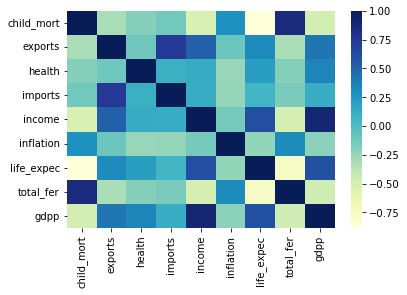

In [5]:
# Checking the correlation
sns.heatmap(data.corr(), cmap="YlGnBu")


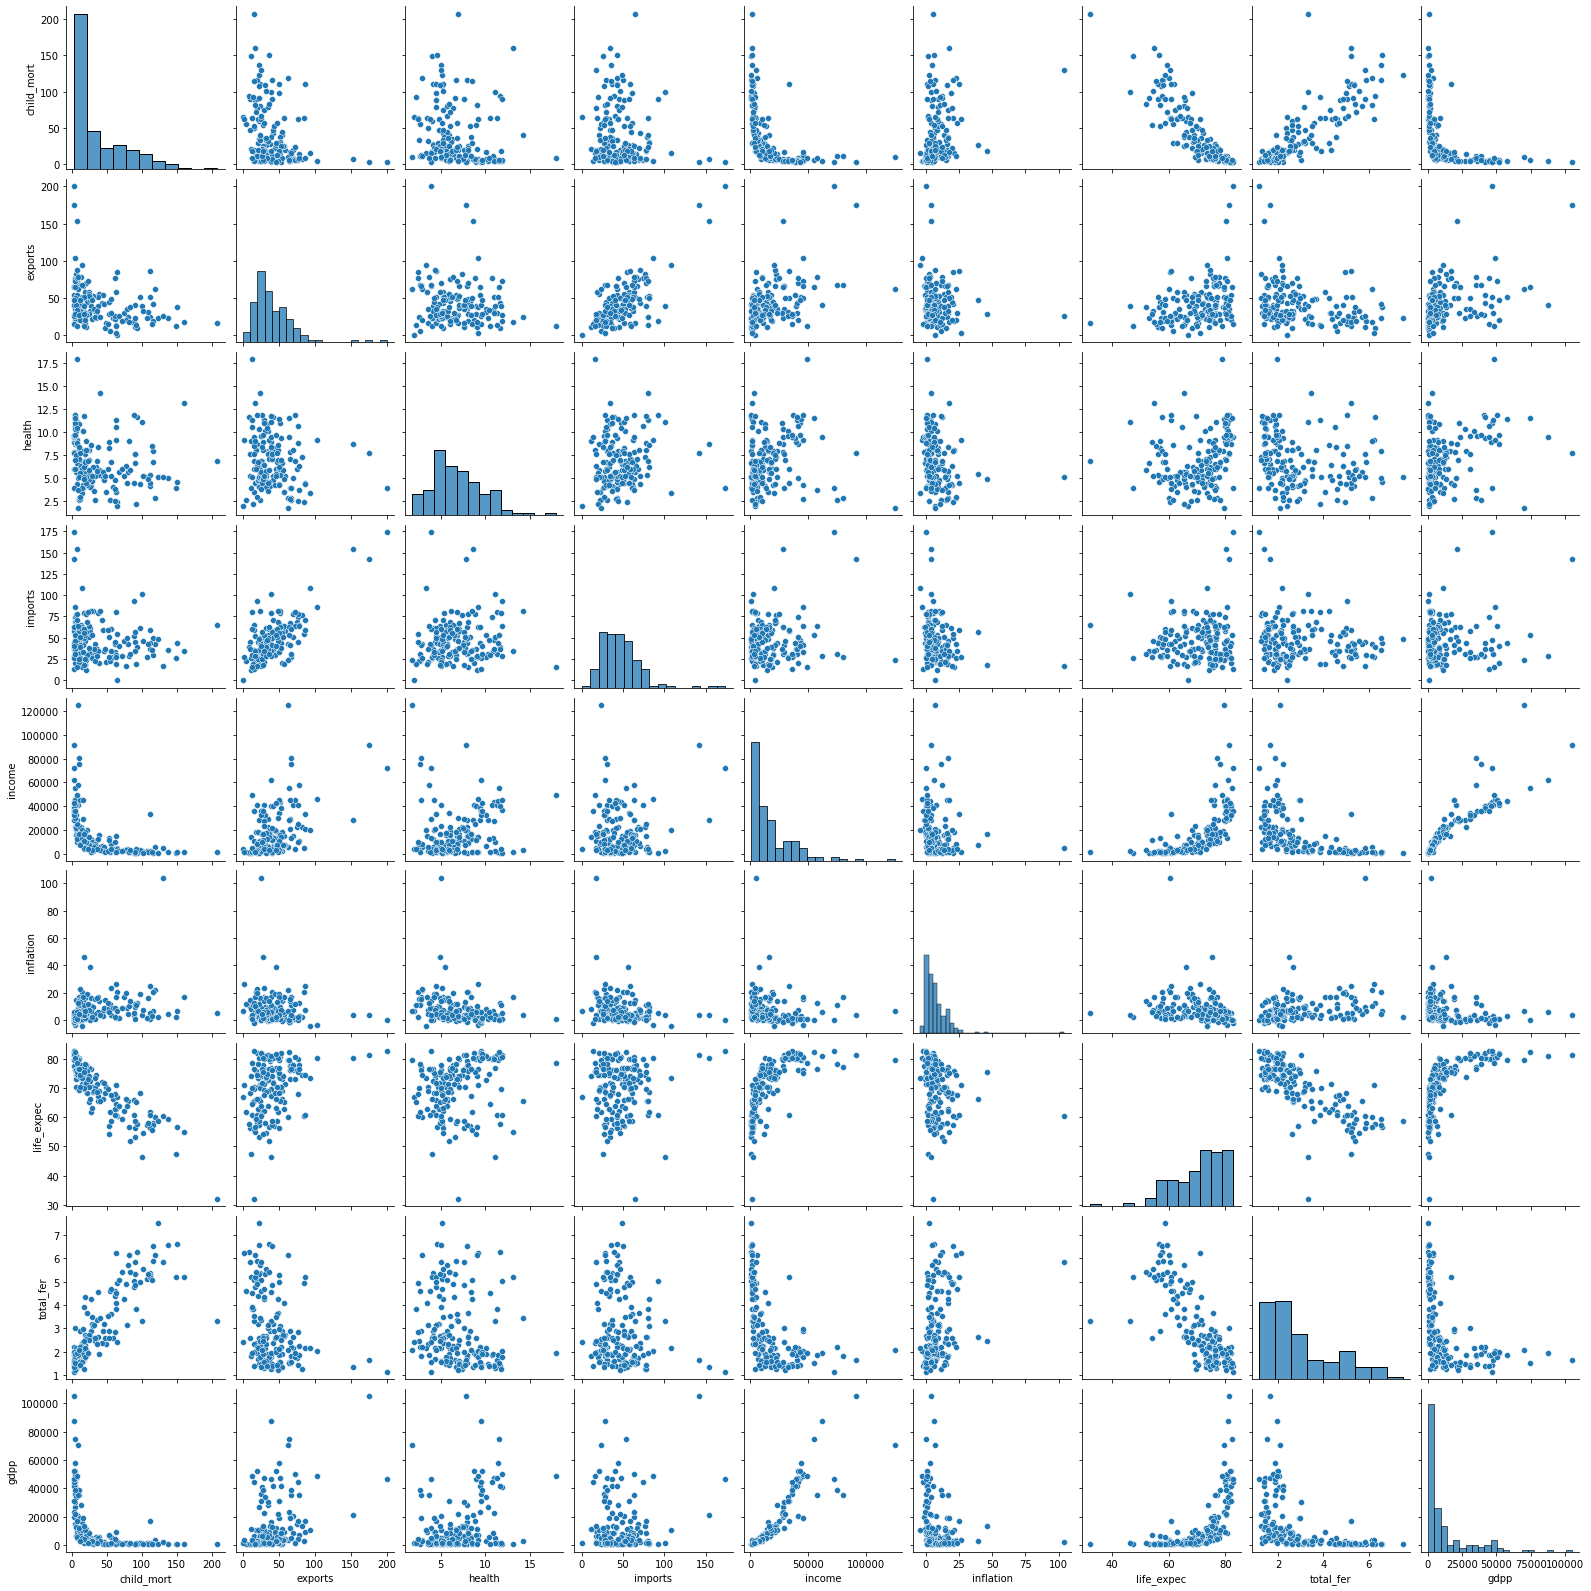

In [6]:
# Plotting the variables
sns.pairplot(data)

<AxesSubplot:xlabel='imports', ylabel='exports'>

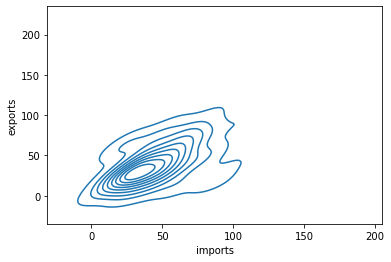

In [7]:
sns.kdeplot(data=data, x=data['imports'], y=data['exports'])

In [8]:
# Scaling the variable for bringing uniformity
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data_df)
scaled_data = pd.DataFrame(scaled_data, columns = data_df.columns)
scaled_data.describe()

child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -2.659217e-17  2.383323e-16  5.218713e-16  2.871954e-16 -7.512288e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean   3.988825e-18  3.616535e-16  3.124580e-16  2.127373e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+00 -1.191250e+00 -6.968005e-01  
25%   -5.666409e-01 -5.927576e-01 -7.639023e-01 -6.366596e-01  
50%   -2.269504e-01  2.869576e-01 -3.564309e-01 -4.544309e-01  
75%    2.816364e-01  7.042584e-01  6.175252e-01  5.942100e-02  
max    9.129718e+00  1.380962e+00  3.009349e+00  5.036507e+00

Silhouettes score per cluster: {2: 0.2732376010655264, 3: 0.2597898273181767, 4: 0.27643024012928297, 5: 0.2814113882528755, 6: 0.22651654978693972, 7: 0.24882957315164397, 8: 0.23948416925941152, 9: 0.21303306185543958} 
 


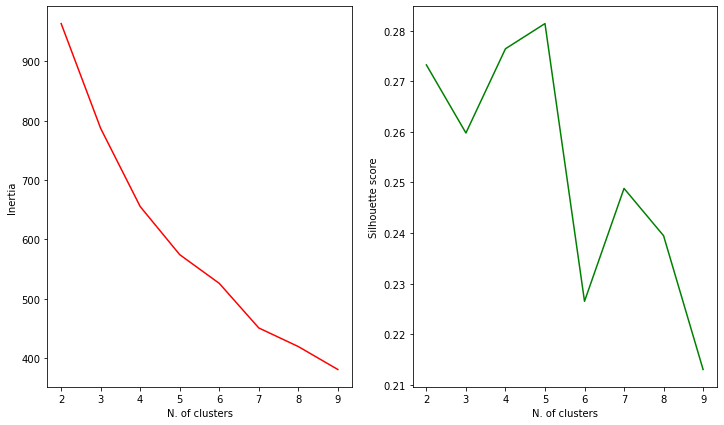

In [9]:
# Checking the silhouette score and kmeans for finding the optimum number of clusters
silhouettes={}
inertia = []
range_n_clusters = list(range(2,10,1))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=60)
    kmeans.fit(scaled_data.iloc[:,1:])
    silhouette_avg = silhouette_score(scaled_data.iloc[:,1:], kmeans.labels_)
    inertia.append(kmeans.inertia_)
    silhouettes[num_clusters]=silhouette_avg

plt.figure(figsize=(12, 7))
plt.subplot(1,2,1)
plt.plot(range_n_clusters,inertia,color='red')
plt.xlabel('N. of clusters')
plt.ylabel('Inertia')


plt.subplot(1,2,2)
plt.plot(silhouettes.keys(),silhouettes.values(),color='green')
plt.xlabel('N. of clusters')
plt.ylabel('Silhouette score')
print(f'Silhouettes score per cluster: {silhouettes} \n ')

In [10]:
#kmeans clustering
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=4)
model_kmeans.fit(scaled_data)
labels=model_kmeans.predict(scaled_data)
print(labels)

[0 1 1 0 1 1 1 3 3 1 1 1 1 1 1 3 1 0 1 1 1 1 1 3 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 3 1 3 1 1 1 1 0 0 1 1 3 3 0 0 1 3 0 3 1 1 0 0 1 0 1 3 1 1 1 0 3
 3 3 1 3 1 1 0 0 3 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 3
 3 0 0 3 1 0 1 1 1 1 1 3 3 1 1 0 1 1 0 1 1 0 2 1 3 1 0 3 3 1 1 0 1 3 3 1 0
 1 0 0 1 1 1 1 0 1 3 3 3 1 1 1 1 1 0 0]


In [11]:
from collections import Counter
Counter(model_kmeans.labels_)

Counter({0: 46, 1: 88, 3: 30, 2: 3})

In [12]:
data['k_labels']=model_kmeans.labels_

In [13]:
data.groupby(['k_labels','country']).mean()

child_mort  exports  health  imports   income  \
k_labels country                                                               
0        Afghanistan                 90.2    10.00    7.58     44.9   1610.0   
         Angola                     119.0    62.30    2.85     42.9   5900.0   
         Benin                      111.0    23.80    4.10     37.2   1820.0   
         Burkina Faso               116.0    19.20    6.74     29.6   1430.0   
         Burundi                     93.6     8.92   11.60     39.2    764.0   
...                                   ...      ...     ...      ...      ...   
3        Sweden                       3.0    46.20    9.63     40.7  42900.0   
         Switzerland                  4.5    64.00   11.50     53.3  55500.0   
         United Arab Emirates         8.6    77.70    3.66     63.6  57600.0   
         United Kingdom               5.2    28.20    9.64     30.8  36200.0   
         United States                7.3    12.40   17.90     15.8  49400.0   

                               inflation  life_expec  total_fer     gdpp  
k_labels country                                                          
0        Afghanistan               9.440        56.2       5.82    553.0  
         Angola                   22.400        60.1       6.16   3530.0  
         Benin                     0.885        61.8       5.36    758.0  
         Burkina Faso              6.810        57.9       5.87    575.0  
         Burundi                  12.300        57.7       6.26    231.0  
...                                  ...         ...        ...      ...  
3        Sweden                    0.991        81.5       1.98  52100.0  
         Switzerland               0.317        82.2       1.52  74600.0  
         United Arab Emirates     12.500        76.5       1.87  35000.0  
         United Kingdom            1.570        80.3       1.92  38900.0  
         United States             1.220        78.7       1.93  48400.0  

[167 rows x 9 columns]

In [14]:
data.rename(columns = {'k_labels':'Cluster'}, inplace = True)

In [15]:
print('Based on K-Means clustering, the countries which belongs to cluster 1, which are most in need of aid are:')
data.loc[data['Cluster']==0]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1, which are most in need of aid are:


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [16]:
print('Based on K-Means clustering, the countries which belongs to cluster 1, which are second most in need of aid are:')
data.loc[data['Cluster']==1]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1, which are second most in need of aid are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Slovak Republic',
 'Solomon Islands',
 'Sri Lanka',
 'S

In [19]:
print('Based on K-Means clustering, the countries which belongs to cluster 1, which are not necessarily in need of aid are:')
data.loc[data['Cluster']==3]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1, which are not necessarily in need of aid are:


['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [20]:
print('Based on K-Means clustering, the countries which belongs to cluster 1, which are not at all in need of aid are:')
data.loc[data['Cluster']==2]['country'].to_list()

Based on K-Means clustering, the countries which belongs to cluster 1, which are not at all in need of aid are:


['Luxembourg', 'Malta', 'Singapore']

The optimum number of clusters using the kmeans clustering method showed 4, and there are 47 countries that fall in the least developed cluster which require immediate help or aid from the NGO.